## Исследование дискретной цепи Маркова

В данной лабораторной работе требуется смоделировать *дискретную эргодическую сеть Маркова*

Давайте сначала разберемся, что это такое.



1.   **Сеть Маркова**

Цепь Маркова - некая последовательность состояний, каждое из которых берется из дискретного пространства состояний (конечного или бесконечного). Сеть Маркова - тоже самое, но в двумерном пространстве, что можно представить графом, когда вершины - состояния, а веса направленных дуг обозначают вероятность перехода из одного состояния в другое. Важным свойством сетей Маркова является **марковское свойство**. Оно предполагает, что нам достаточно знать текущее состояние сети, чтобы делать предсказания о ее будущем, или, другими словами, нам не нужна никакая дополнительная информация о *будущем*, собираемая из *прошлого*

2.   **Дискретная сеть Маркова**

Сети Маркова состоят из случайных величин, которые могут менять свое состояние в зависимости от времени, но это могут быть *дискретные* замеры (например, подкидывания монетки ровно в полдень каждый день), или *непрерывные* замеры (график на бирже). Нас интересует дискретная сеть Маркова, то есть состояние сети будет пересчитываться каждый определенный промежуток времени

3.   **Эргодическая сеть Маркова**

Бывают **разложимые** и **неразложимые** сети. В разложимых сетях есть *невозвратные* состояния, когда при попадании в это состояние сеть больше никогда не меняет его, или, если мы представляем ее графом, из этой вершины не выходит ни одной дуги. В неразложимых сетях таких состояний нет (и это сильно связный граф, в котором мы из каждого состояния можем перейти в другое, не обязательно за один проход)

На самом деле, невозвратными могут быть и группы состояний, но это уже сложнее, и в лабораторной не указано, что мы рассматриваем такие определения.

Также существуют периодические сети (в которых существует некий период смены состояний, и он повторяется из раза в раз) и непериодические.

Если сеть *неразложима* и *непериодическая* мы называем ее **эргодической**. Для таких систем существуют предельные распределения вероятностей при n → ∞

$$π_j = \lim\limits_{n\to ∞} π_j^{(n)}$$

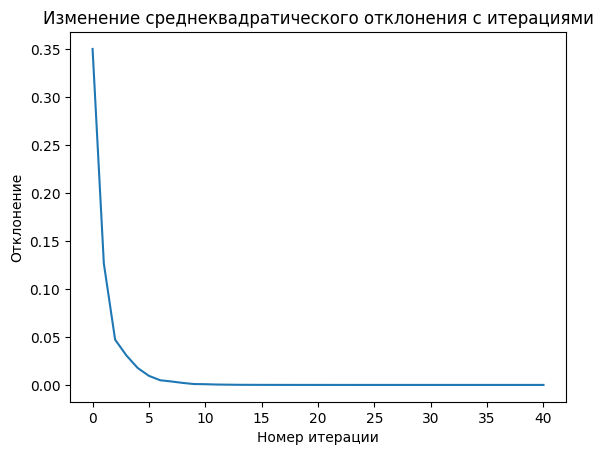

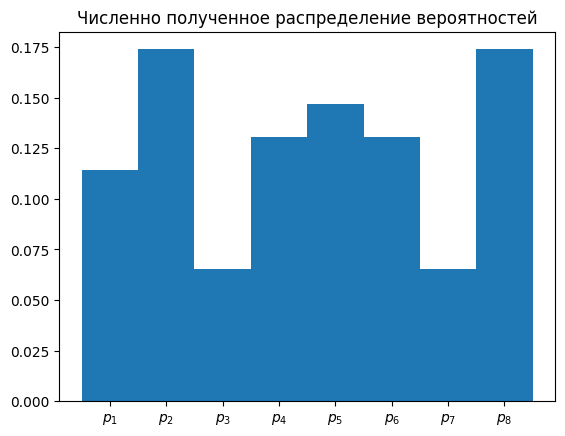

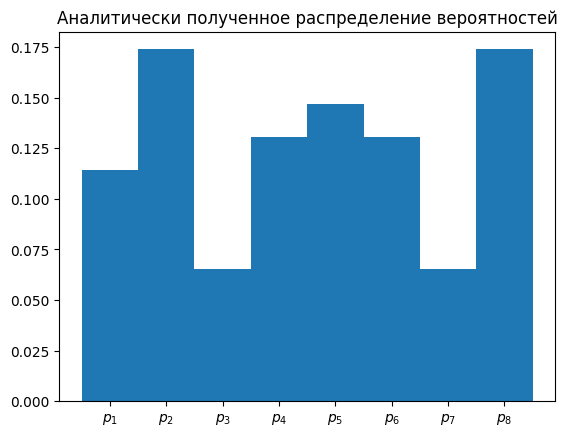

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MarkovChain:
    def __init__(self, chain, start):
        self.chain = chain
        self.start = start.astype(float)

        self.checkValues()

    def checkValues(self):
        if self.start.shape[0] != self.chain.shape[0] or self.start.shape[0] != self.chain.shape[1]:
            print("Проверьте вводные данные на размерность")
        for i in range(self.chain.shape[0]):
            if abs(sum(self.chain[i]) - 1) > 0.000000001:
                print(f"Проверьте {i + 1} строку на равенство суммы единице ({sum(self.chain[i])})")
        if abs(sum(self.start) - 1) > 0.000000001:
            print("Проверьте стартовые вероятности на равенство суммы еденице")

    def findAnalitick(self):
        matric = self.chain
        matric = matric.T
        b = np.zeros(matric.shape[0])

        for i in range(matric.shape[0]):
            matric[i, i] -= 1
            b[i] -= matric[i, i]
            matric[i] -= matric[i, i]

        answer = np.linalg.solve(matric, b)
        if (abs(sum(answer) - 1) > 0.000000001):
          print("Решение не найдено")
          return

        return answer

    def findNumberick(self, eps):
        past = self.start - 100
        new = self.start
        steps = []


        while np.linalg.norm(new - past) > eps:
            past = new
            new = new @ self.chain
            steps.append((new - past).std())
            if (abs(sum(past) - 1) > 0.000000001):
                print("Что-то пошло не так")
                return

        plt.plot(steps)
        plt.title("Изменение среднеквадратического отклонения с итерациями")
        plt.xlabel("Номер итерации")
        plt.ylabel("Отклонение")
        plt.show()


        plt.title("Численно полученное распределение вероятностей")
        plt.stairs(new, fill=True)
        plt.xticks(np.fromiter((i + 0.5 for i in range(len(b))), float), (f"$p_{i}$" for i in range(1, len(b) + 1)))
        plt.show()


a = np.array([[0.2, 0, 0, 0.4, 0, 0.4, 0, 0],
              [0, 0.2, 0, 0, 0.3, 0, 0, 0.5],
              [0.7, 0, 0.2, 0, 0.1, 0, 0, 0],
              [0, 0, 0.4, 0.2, 0, 0, 0, 0.4],
              [0, 0, 0, 0.4, 0.2, 0.4, 0, 0],
              [0, 0.4, 0, 0, 0, 0.2, 0.4, 0],
              [0.7, 0, 0, 0, 0.1, 0, 0.2, 0],
              [0, 0.5, 0, 0, 0.3, 0, 0, 0.2]])
b = np.array([0, 0, 0, 0, 0, 0, 0, 1])

m = MarkovChain(a, b)
m.findNumberick(0.000000001)

plt.title("Аналитически полученное распределение вероятностей")
plt.stairs(m.findAnalitick(), fill=True)
plt.xticks(np.fromiter((i + 0.5 for i in range(len(b))), float), (f"$p_{i}$" for i in range(1, len(b) + 1)))
plt.show()

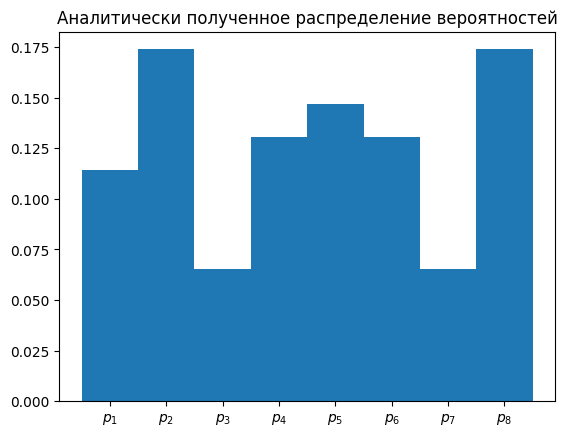

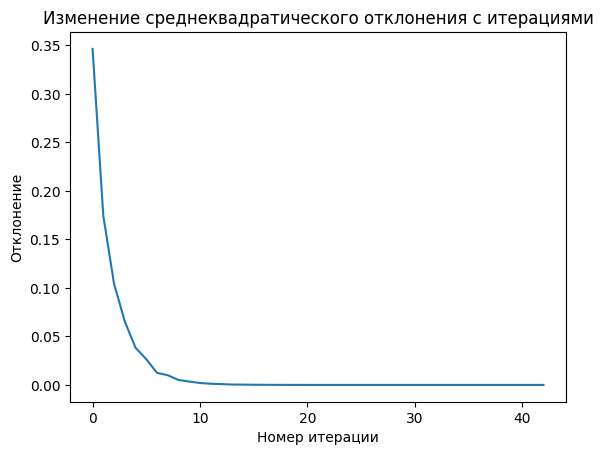

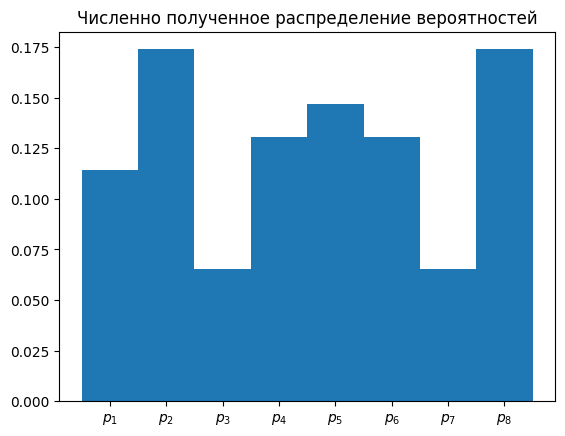

In [ ]:
a = np.array([[0.2, 0, 0, 0.4, 0, 0.4, 0, 0],
              [0, 0.2, 0, 0, 0.3, 0, 0, 0.5],
              [0.7, 0, 0.2, 0, 0.1, 0, 0, 0],
              [0, 0, 0.4, 0.2, 0, 0, 0, 0.4],
              [0, 0, 0, 0.4, 0.2, 0.4, 0, 0],
              [0, 0.4, 0, 0, 0, 0.2, 0.4, 0],
              [0.7, 0, 0, 0, 0.1, 0, 0.2, 0],
              [0, 0.5, 0, 0, 0.3, 0, 0, 0.2]])
b = np.array([1, 0, 0, 0, 0, 0, 0, 0])

m = MarkovChain(a, b)

plt.title("Аналитически полученное распределение вероятностей")
plt.stairs(m.findAnalitick(), fill=True)
plt.xticks(np.fromiter((i + 0.5 for i in range(len(b))), float), (f"$p_{i}$" for i in range(1, len(b) + 1)))
plt.show()
m.chain = np.array([[0.2, 0, 0, 0.4, 0, 0.4, 0, 0],
              [0, 0.2, 0, 0, 0.3, 0, 0, 0.5],
              [0.7, 0, 0.2, 0, 0.1, 0, 0, 0],
              [0, 0, 0.4, 0.2, 0, 0, 0, 0.4],
              [0, 0, 0, 0.4, 0.2, 0.4, 0, 0],
              [0, 0.4, 0, 0, 0, 0.2, 0.4, 0],
              [0.7, 0, 0, 0, 0.1, 0, 0.2, 0],
              [0, 0.5, 0, 0, 0.3, 0, 0, 0.2]])
m.findNumberick(0.000000001)